<a href="https://colab.research.google.com/github/Svhugani/QOptics/blob/main/TTCF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install qutip

     |████████████████████████████████| 14.6MB 283kB/s 


In [4]:
import qutip as qt
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

In [34]:
def TTCF(times, g, gamma_1, gamma_3, omega, dim):
  I = qt.identity(dim)
  a1 = qt.tensor(qt.destroy(dim),I,I)
  a2 = qt.tensor(I,qt.destroy(dim),I)
  a3 = qt.tensor(I,I,qt.destroy(dim))

  H = omega * (a1.dag() * a1 + a2.dag() * a2 + a3.dag() * a3) + g * (a1.dag() * a2 + a2.dag() * a1 + a2.dag() * a3 + a3.dag() * a2 )
  Heff = (omega - 1j * gamma_1 / 2) * a1.dag() * a1 + omega * a2.dag() * a2 + (omega - 1j * gamma_3 / 2) * a3.dag() * a3 + g * (a1.dag() * a2 + a2.dag() * a1 + a2.dag() * a3 + a3.dag() * a2 )
  L = -1.0j * (qt.spre(H) - qt.spost(H))
  L += gamma_1 * qt.lindblad_dissipator(a1)
  L += gamma_3 * qt.lindblad_dissipator(a3)

  SystemMatrix = H
  ttcf_1 = qt.correlation_2op_1t(SystemMatrix, None, times, [np.sqrt(0.5 * gamma_1) * a1, np.sqrt(0.5 * gamma_3) * a3], a1, a1.dag(), reverse = True).real
  ttcf_2 = qt.correlation_2op_1t(SystemMatrix, None, times, [np.sqrt(0.5 * gamma_1) * a1, np.sqrt(0.5 * gamma_3) * a3], a3, a3.dag(), reverse = True).real
  
  if SystemMatrix == L:
    systemName = "Liouviliian"
  elif SystemMatrix == Heff:
    systemName = "Effective Hamiltionian"
  elif SystemMatrix == H:
    systemName = "Hamiltionian"
  else:
    systemName = "---"

  for i in range(len(ttcf_1)):
    ttcf_1[i] = max(0.0001, ttcf_1[i])
    ttcf_2[i] = max(0.0001, ttcf_2[i])

  return [np.log(ttcf_1), np.log(ttcf_2), systemName]
  #return [ttcf_1,ttcf_2, systemName]

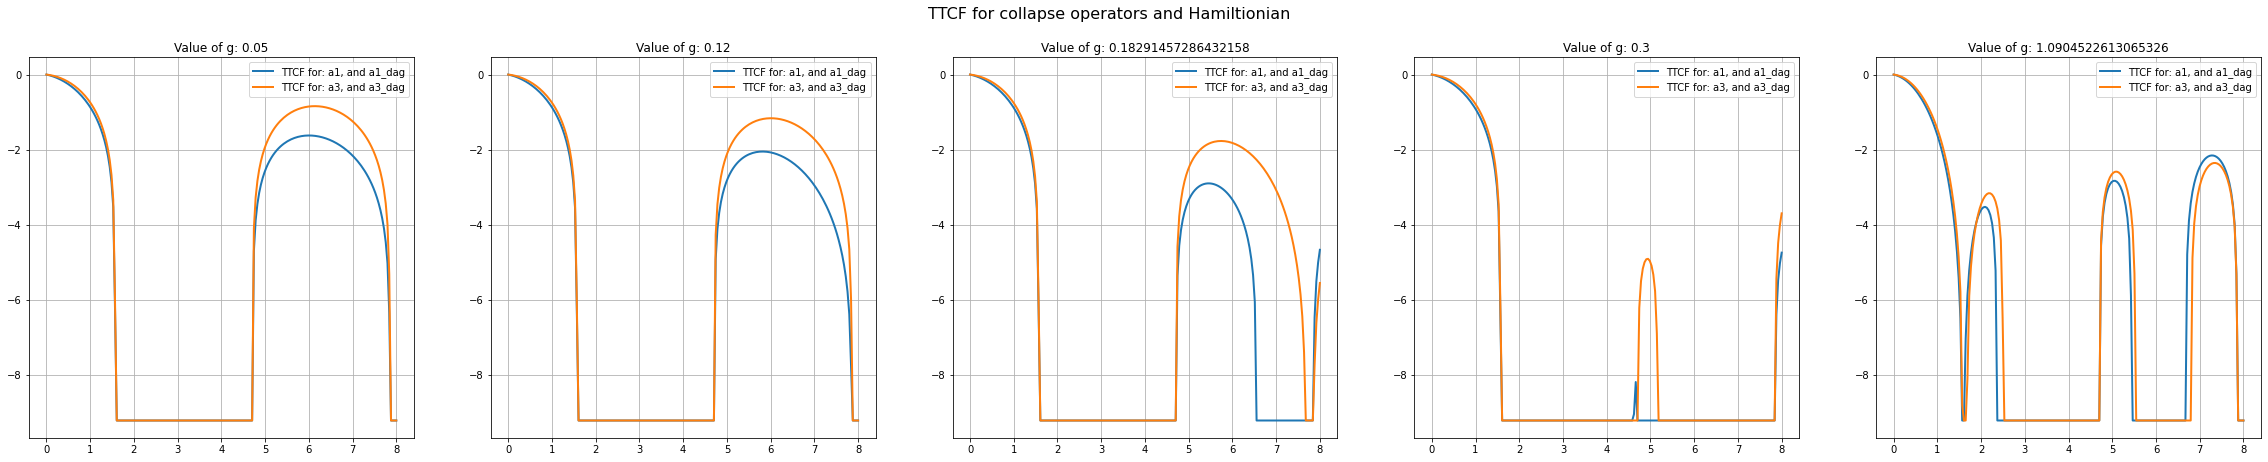

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
gValues = [0.05, 0.12,0.18291457286432158, .30, 1.0904522613065326]
times = np.linspace(0,8,200)
omega = 1
gamma_1 = omega
gamma_3 = 0.5 * omega
dim = 2


fig = plt.figure()
fig.set_size_inches(40, 7)
iterator = 0

for g in gValues:
  iterator += 1
  Corr = TTCF(times, g, gamma_1, gamma_3, omega, dim) 
  ax = fig.add_subplot(1, len(gValues), iterator)
  ax.grid()
  ax.legend()
  ax.set_title("Value of g: " + str(g))
  line1 = ax.plot(times, Corr[0], linestyle = "solid", linewidth = 2 ,label = "TTCF for: a1, and a1_dag" )
  line2 = ax.plot(times, Corr[1], linestyle = "solid", linewidth = 2 ,label = "TTCF for: a3, and a3_dag" ) 
  ax.set_label("subFor" + str(g))
  ax.legend()


mainTitle = "TTCF for collapse operators and " + str(Corr[2])
fig.suptitle(mainTitle, fontsize=16)
plt.show()
filename = mainTitle + ".png"
fig.savefig(filename)

files.download(filename) 